Time Series Model Referred from AV Free courses!!!

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
import sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##### Libraries to avoid future warnings pop during practice

In [0]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#### Loading the Dataset

In [0]:
url='https://raw.githubusercontent.com/Muralitharan2789/Hacathons/master/Machine%20Learning%20for%20IoT_AV/Datasets/'

In [0]:
train=pd.read_csv(url+'train_aWnotuB.csv')
test=pd.read_csv(url+'test_BdBKkAj_L87Nc3S.csv')
sample=pd.read_csv(url+'sample_submission_KVKNmI7.csv')

In [0]:
train_original=train
test_original=test

In [6]:
train.shape,test.shape,sample.shape

((48120, 4), (11808, 3), (11808, 2))

In [7]:
train.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [8]:
test.head()

,DateTime,Junction,ID
0,2017-07-01 00:00:00,1,20170701001
1,2017-07-01 01:00:00,1,20170701011
2,2017-07-01 02:00:00,1,20170701021
3,2017-07-01 03:00:00,1,20170701031
4,2017-07-01 04:00:00,1,20170701041


In [9]:
test.Junction.value_counts()

4    2952
3    2952
2    2952
1    2952
Name: Junction, dtype: int64

In [0]:
train.rename(columns={'DateTime':'Datetime','Vehicles':'Count'},inplace=True)
test.rename(columns={'DateTime':'Datetime'},inplace=True)

In [0]:
train['Datetime'] = pd.to_datetime(train.Datetime,format='%Y-%m-%d %H:%M:%S') 
test['Datetime'] = pd.to_datetime(test.Datetime,format='%Y-%m-%d %H:%M:%S') 
test_original['Datetime'] = pd.to_datetime(test_original.Datetime,format='%Y-%m-%d %H:%M:%S')
train_original['Datetime'] = pd.to_datetime(train_original.Datetime,format='%Y-%m-%d %H:%M:%S')

In [0]:
for i in (train, test, test_original, train_original):
    i['year']=i.Datetime.dt.year 
    i['month']=i.Datetime.dt.month 
    i['day']=i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour 

In [13]:
train_original.head()

,Datetime,Junction,Count,ID,year,month,day,Hour
0,2015-11-01 00:00:00,1,15,20151101001,2015,11,1,0
1,2015-11-01 01:00:00,1,13,20151101011,2015,11,1,1
2,2015-11-01 02:00:00,1,10,20151101021,2015,11,1,2
3,2015-11-01 03:00:00,1,7,20151101031,2015,11,1,3
4,2015-11-01 04:00:00,1,9,20151101041,2015,11,1,4


In [0]:
train['day of week']=train['Datetime'].dt.dayofweek 
temp = train['Datetime']

In [0]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0 
temp2 = train['Datetime'].apply(applyer) 
train['weekend']=temp2

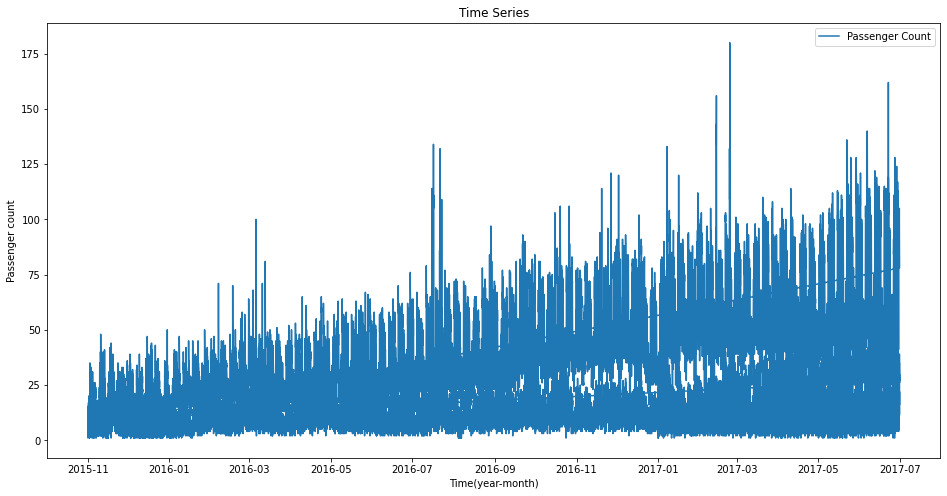

In [16]:
train.index = train['Datetime'] # indexing the Datetime to get the time period on the x-axis. 
df=train.drop('ID',1)           # drop ID variable to get only the Datetime on x-axis. 
ts = df['Count'] 
plt.figure(figsize=(16,8)) 
plt.plot(ts, label='Passenger Count') 
plt.title('Time Series') 
plt.xlabel("Time(year-month)") 
plt.ylabel("Passenger count") 
plt.legend(loc='best')

#### Exploratory Analysis

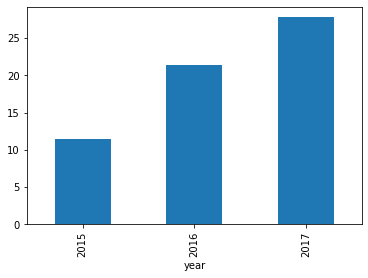

In [17]:
train.groupby('year')['Count'].mean().plot.bar()

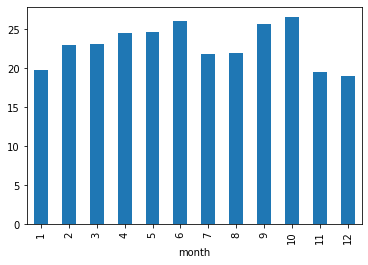

In [18]:
train.groupby('month')['Count'].mean().plot.bar()

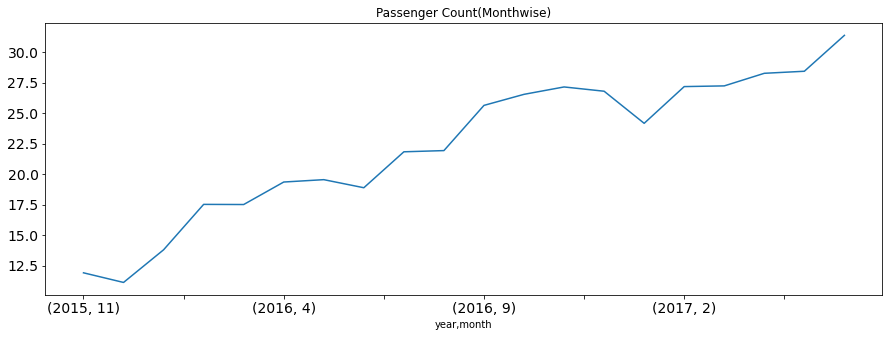

In [19]:
temp=train.groupby(['year', 'month'])['Count'].mean() 
temp.plot(figsize=(15,5), title= 'Passenger Count(Monthwise)', fontsize=14)

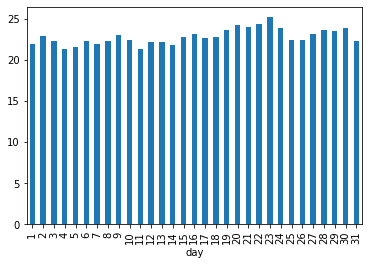

In [20]:
train.groupby('day')['Count'].mean().plot.bar()

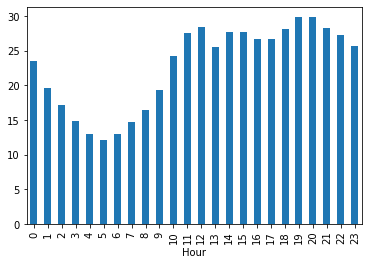

In [21]:
train.groupby('Hour')['Count'].mean().plot.bar()

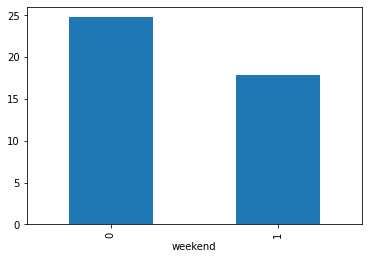

In [22]:
train.groupby('weekend')['Count'].mean().plot.bar()

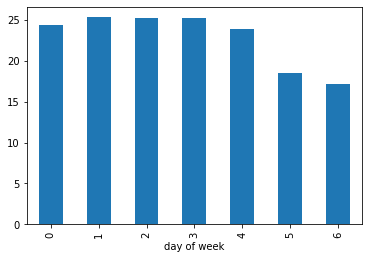

In [23]:
train.groupby('day of week')['Count'].mean().plot.bar()

In [0]:
train=train.drop('ID',1)

In [25]:
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp 
# Hourly time series 
hourly = train.resample('H').mean() 
# Converting to daily mean 
daily = train.resample('D').mean() 
# Converting to weekly mean 
weekly = train.resample('W').mean() 
# Converting to monthly mean 
monthly = train.resample('M').mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


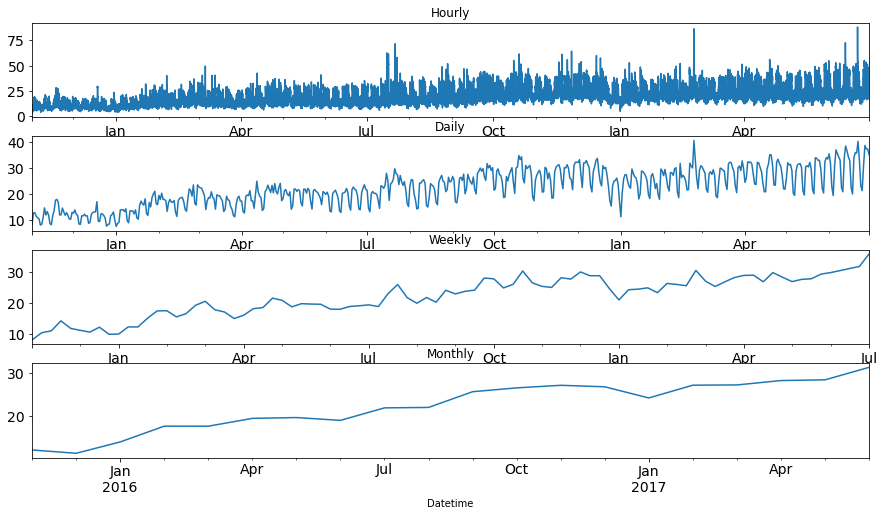

In [26]:
fig, axs = plt.subplots(4,1) 
hourly.Count.plot(figsize=(15,8), title= 'Hourly', fontsize=14, ax=axs[0]) 
daily.Count.plot(figsize=(15,8), title= 'Daily', fontsize=14, ax=axs[1]) 
weekly.Count.plot(figsize=(15,8), title= 'Weekly', fontsize=14, ax=axs[2]) 
monthly.Count.plot(figsize=(15,8), title= 'Monthly', fontsize=14, ax=axs[3]) 

In [27]:
train.head()

,Datetime,Junction,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,,,
2015-11-01 00:00:00,2015-11-01 00:00:00,1,15,2015,11,1,0,6,1
2015-11-01 01:00:00,2015-11-01 01:00:00,1,13,2015,11,1,1,6,1
2015-11-01 02:00:00,2015-11-01 02:00:00,1,10,2015,11,1,2,6,1
2015-11-01 03:00:00,2015-11-01 03:00:00,1,7,2015,11,1,3,6,1
2015-11-01 04:00:00,2015-11-01 04:00:00,1,9,2015,11,1,4,6,1


In [28]:
test.Timestamp = pd.to_datetime(test.Datetime,format='%Y-%m-%d %H:%M:%S') 
test.index = test.Timestamp  

# Converting to daily mean 
test = test.resample('D').mean() 

train.Timestamp = pd.to_datetime(train.Datetime,format='%Y-%m-%d %H:%M:%S') 
train.index = train.Timestamp 
# Converting to daily mean 
train = train.resample('D').mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [29]:
train.head()

,Junction,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,,
2015-11-01,2.0,8.277778,2015.0,11.0,1.0,11.5,6.0,1.0
2015-11-02,2.0,12.625000,2015.0,11.0,2.0,11.5,0.0,0.0
2015-11-03,2.0,12.652778,2015.0,11.0,3.0,11.5,1.0,0.0
2015-11-04,2.0,11.361111,2015.0,11.0,4.0,11.5,2.0,0.0
2015-11-05,2.0,10.694444,2015.0,11.0,5.0,11.5,3.0,0.0


In [30]:
train.index.min()

Timestamp('2015-11-01 00:00:00', freq='D')

In [0]:
Train=train.loc['2015-11-01':'2017-03-30'] 
valid=train.loc['2017-03-30':'2017-06-30']

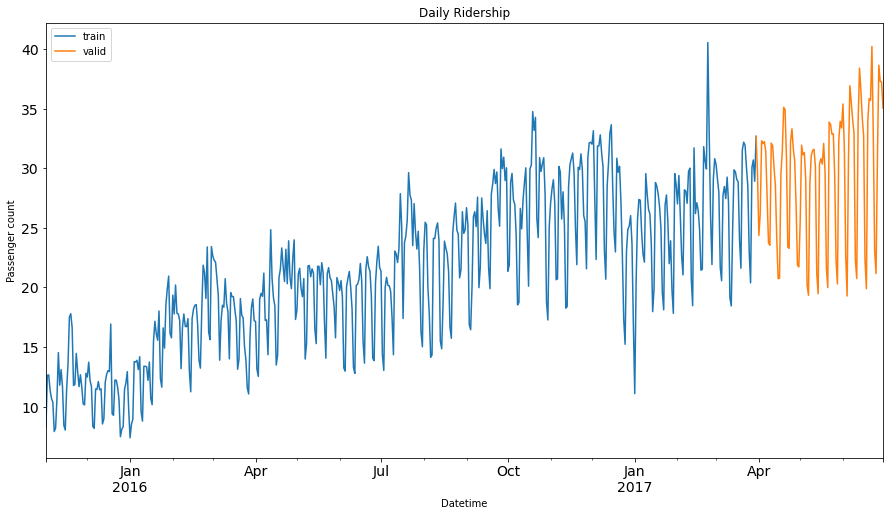

In [32]:
Train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='train') 
valid.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='valid') 
plt.xlabel("Datetime") 
plt.ylabel("Passenger count") 
plt.legend(loc='best') 
plt.show()

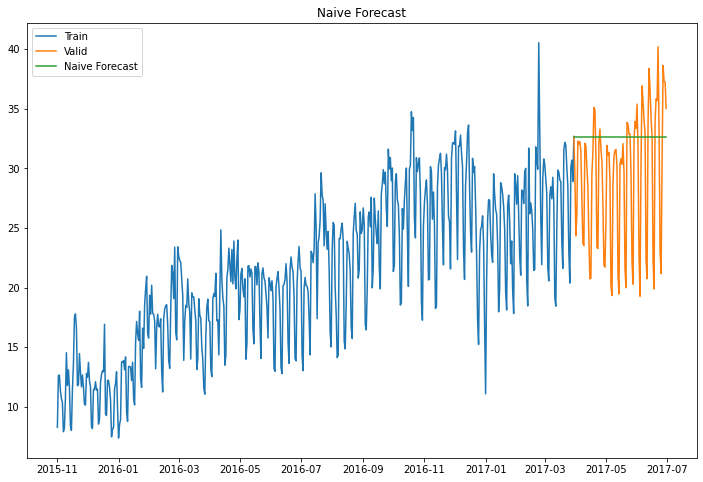

In [33]:
dd= np.asarray(Train.Count) 
y_hat = valid.copy() 
y_hat['naive'] = dd[len(dd)-1] 
plt.figure(figsize=(12,8)) 
plt.plot(Train.index, Train['Count'], label='Train') 
plt.plot(valid.index,valid['Count'], label='Valid') 
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast') 
plt.legend(loc='best') 
plt.title("Naive Forecast") 
plt.show()

In [34]:
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = sqrt(mean_squared_error(valid.Count, y_hat.naive)) 
print(rms)

6.3726520840583625


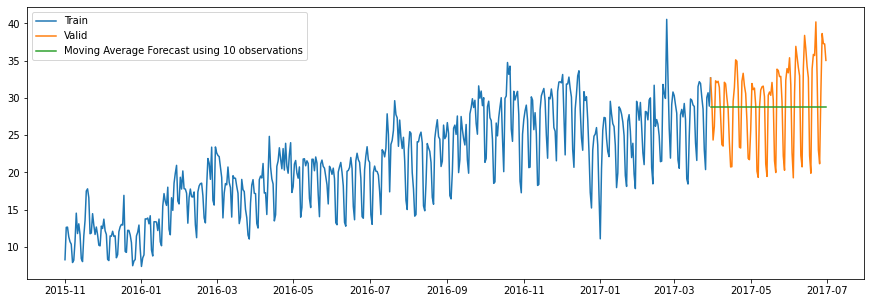

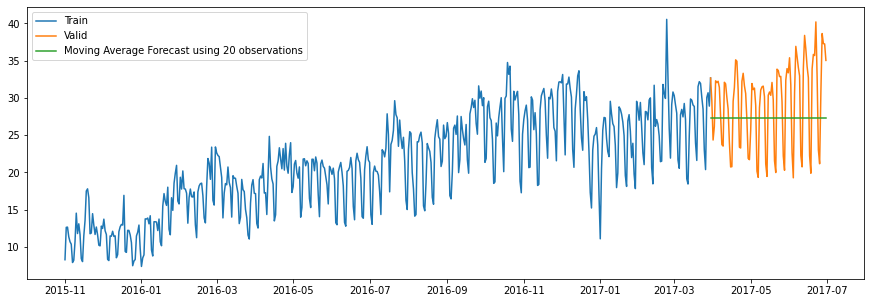

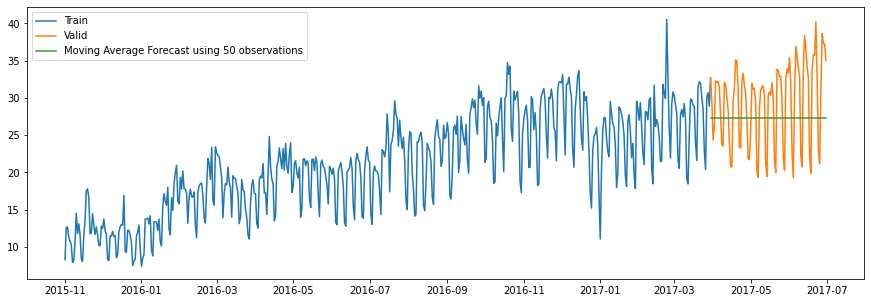

In [35]:
y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(10).mean().iloc[-1] # average of last 10 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 10 observations') 
plt.legend(loc='best') 
plt.show() 
y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(20).mean().iloc[-1] # average of last 20 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 20 observations') 
plt.legend(loc='best') 
plt.show() 
y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(50).mean().iloc[-1] # average of last 50 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 50 observations') 
plt.legend(loc='best') 
plt.show()

In [36]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.moving_avg_forecast)) 
print(rms)

5.847720507261641


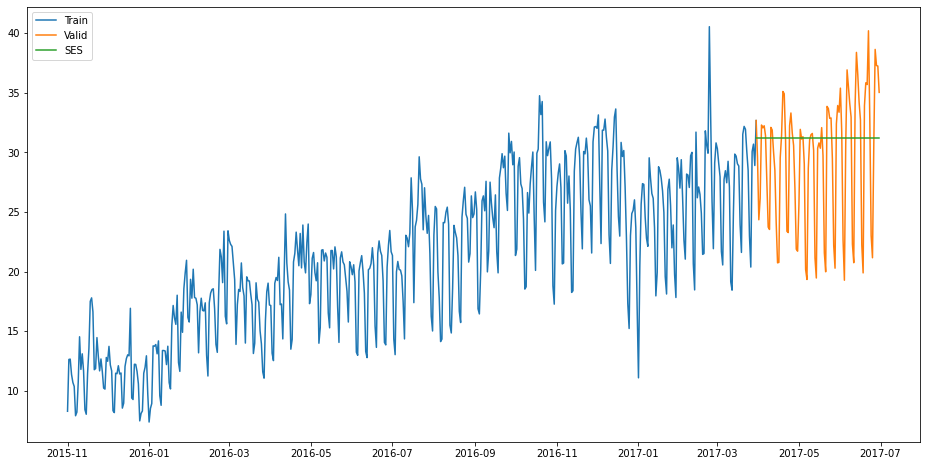

In [37]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt 
y_hat_avg = valid.copy() 
fit2 = SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(valid)) 
plt.figure(figsize=(16,8)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['SES'], label='SES') 
plt.legend(loc='best') 
plt.show()

In [38]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.SES)) 
print(rms)

5.762707766804816


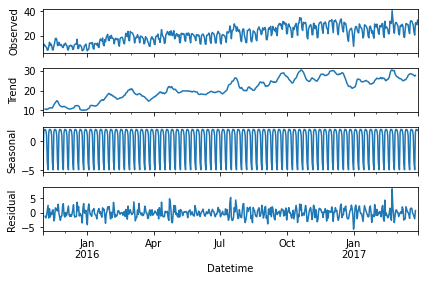

In [39]:
import statsmodels.api as sm 
sm.tsa.seasonal_decompose(Train.Count).plot() 
result = sm.tsa.stattools.adfuller(train.Count) 
plt.show()

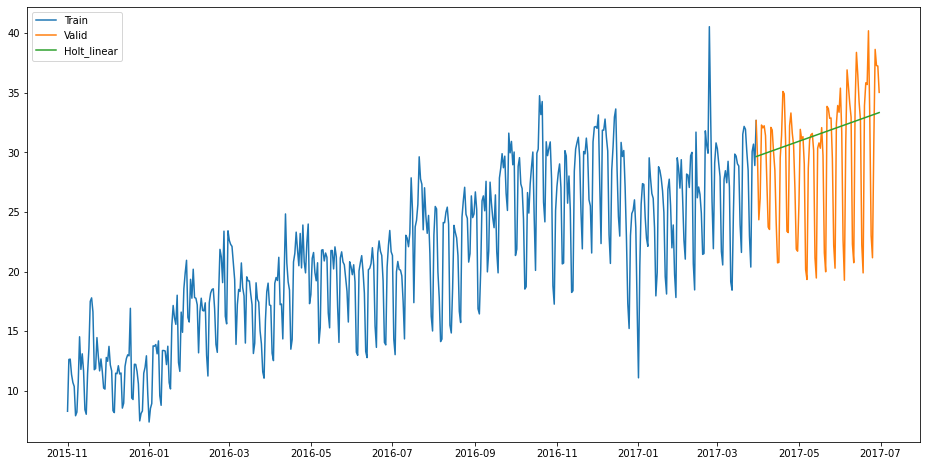

In [40]:
y_hat_avg = valid.copy() 
fit1 = Holt(np.asarray(Train['Count'])).fit(smoothing_level = 0.3,smoothing_slope = 0.01) 
y_hat_avg['Holt_linear'] = fit1.forecast(len(valid)) 
plt.figure(figsize=(16,8)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear') 
plt.legend(loc='best') 
plt.show()

In [41]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_linear)) 
print(rms)

5.725223945653805


In [0]:
predict=fit1.forecast(len(test))

In [0]:
test['prediction']=predict

In [0]:
train_original['ratio']=train_original['Count']/train_original['Count'].sum() 

In [45]:
train_original.head(3)

,Datetime,Junction,Count,ID,year,month,day,Hour,day of week,weekend,ratio
Datetime,,,,,,,,,,,
2015-11-01 00:00:00,2015-11-01 00:00:00,1,15,20151101001,2015,11,1,0,6,1,0.000014
2015-11-01 01:00:00,2015-11-01 01:00:00,1,13,20151101011,2015,11,1,1,6,1,0.000012
2015-11-01 02:00:00,2015-11-01 02:00:00,1,10,20151101021,2015,11,1,2,6,1,0.000009


In [46]:
temp=train_original.groupby(['Hour'])['ratio'].sum() 
temp

Hour
0     0.043037
1     0.035933
2     0.031267
3     0.027144
4     0.023717
5     0.022255
6     0.023730
7     0.026880
8     0.029988
9     0.035429
10    0.044297
11    0.050266
12    0.051928
13    0.046780
14    0.050646
15    0.050550
16    0.048765
17    0.048718
18    0.051363
19    0.054580
20    0.054525
21    0.051560
22    0.049776
23    0.046866
Name: ratio, dtype: float64

In [0]:
pd.DataFrame(temp, columns=['Hour','ratio']).to_csv('GROUPby.csv') 

In [0]:
temp2=pd.read_csv("GROUPby.csv") 
temp2=temp2.drop('Hour.1',1) 

In [49]:
merge=pd.merge(test, test_original, on=('day','month', 'year'), how='left') 
merge

,Junction_x,ID_x,year,month,day,Hour_x,prediction,Datetime,Junction_y,ID_y,Hour_y
0,2.5,2.017070e+10,2017.0,7.0,1.0,11.5,29.645871,2017-07-01 00:00:00,1,20170701001,0
1,2.5,2.017070e+10,2017.0,7.0,1.0,11.5,29.645871,2017-07-01 01:00:00,1,20170701011,1
2,2.5,2.017070e+10,2017.0,7.0,1.0,11.5,29.645871,2017-07-01 02:00:00,1,20170701021,2
3,2.5,2.017070e+10,2017.0,7.0,1.0,11.5,29.645871,2017-07-01 03:00:00,1,20170701031,3
4,2.5,2.017070e+10,2017.0,7.0,1.0,11.5,29.645871,2017-07-01 04:00:00,1,20170701041,4
...,...,...,...,...,...,...,...,...,...,...,...
11803,2.5,2.017103e+10,2017.0,10.0,31.0,11.5,34.539079,2017-10-31 19:00:00,4,20171031194,19
11804,2.5,2.017103e+10,2017.0,10.0,31.0,11.5,34.539079,2017-10-31 20:00:00,4,20171031204,20
11805,2.5,2.017103e+10,2017.0,10.0,31.0,11.5,34.539079,2017-10-31 21:00:00,4,20171031214,21
11806,2.5,2.017103e+10,2017.0,10.0,31.0,11.5,34.539079,2017-10-31 22:00:00,4,20171031224,22


In [50]:
merge['Hour']=merge['Hour_y'] 
merge

,Junction_x,ID_x,year,month,day,Hour_x,prediction,Datetime,Junction_y,ID_y,Hour_y,Hour
0,2.5,2.017070e+10,2017.0,7.0,1.0,11.5,29.645871,2017-07-01 00:00:00,1,20170701001,0,0
1,2.5,2.017070e+10,2017.0,7.0,1.0,11.5,29.645871,2017-07-01 01:00:00,1,20170701011,1,1
2,2.5,2.017070e+10,2017.0,7.0,1.0,11.5,29.645871,2017-07-01 02:00:00,1,20170701021,2,2
3,2.5,2.017070e+10,2017.0,7.0,1.0,11.5,29.645871,2017-07-01 03:00:00,1,20170701031,3,3
4,2.5,2.017070e+10,2017.0,7.0,1.0,11.5,29.645871,2017-07-01 04:00:00,1,20170701041,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...
11803,2.5,2.017103e+10,2017.0,10.0,31.0,11.5,34.539079,2017-10-31 19:00:00,4,20171031194,19,19
11804,2.5,2.017103e+10,2017.0,10.0,31.0,11.5,34.539079,2017-10-31 20:00:00,4,20171031204,20,20
11805,2.5,2.017103e+10,2017.0,10.0,31.0,11.5,34.539079,2017-10-31 21:00:00,4,20171031214,21,21
11806,2.5,2.017103e+10,2017.0,10.0,31.0,11.5,34.539079,2017-10-31 22:00:00,4,20171031224,22,22


In [0]:
merge=merge.drop(['year', 'month','Hour_x','Hour_y'], axis=1) 

In [52]:
merge

,Junction_x,ID_x,day,prediction,Datetime,Junction_y,ID_y,Hour
0,2.5,2.017070e+10,1.0,29.645871,2017-07-01 00:00:00,1,20170701001,0
1,2.5,2.017070e+10,1.0,29.645871,2017-07-01 01:00:00,1,20170701011,1
2,2.5,2.017070e+10,1.0,29.645871,2017-07-01 02:00:00,1,20170701021,2
3,2.5,2.017070e+10,1.0,29.645871,2017-07-01 03:00:00,1,20170701031,3
4,2.5,2.017070e+10,1.0,29.645871,2017-07-01 04:00:00,1,20170701041,4
...,...,...,...,...,...,...,...,...
11803,2.5,2.017103e+10,31.0,34.539079,2017-10-31 19:00:00,4,20171031194,19
11804,2.5,2.017103e+10,31.0,34.539079,2017-10-31 20:00:00,4,20171031204,20
11805,2.5,2.017103e+10,31.0,34.539079,2017-10-31 21:00:00,4,20171031214,21
11806,2.5,2.017103e+10,31.0,34.539079,2017-10-31 22:00:00,4,20171031224,22


In [0]:
# Predicting by merging merge and temp2 
prediction=pd.merge(merge, temp2, on='Hour', how='left') 

In [0]:
prediction['Count']=prediction['prediction']*prediction['ratio']*24 
prediction['ID']=prediction['ID_y']

In [55]:
prediction

,Junction_x,ID_x,day,prediction,Datetime,Junction_y,ID_y,Hour,ratio,Count,ID
0,2.5,2.017070e+10,1.0,29.645871,2017-07-01 00:00:00,1,20170701001,0,0.043037,30.620543,20170701001
1,2.5,2.017070e+10,1.0,29.645871,2017-07-01 01:00:00,1,20170701011,1,0.035933,25.566100,20170701011
2,2.5,2.017070e+10,1.0,29.645871,2017-07-01 02:00:00,1,20170701021,2,0.031267,22.246426,20170701021
3,2.5,2.017070e+10,1.0,29.645871,2017-07-01 03:00:00,1,20170701031,3,0.027144,19.312760,20170701031
4,2.5,2.017070e+10,1.0,29.645871,2017-07-01 04:00:00,1,20170701041,4,0.023717,16.874742,20170701041
...,...,...,...,...,...,...,...,...,...,...,...
11803,2.5,2.017103e+10,31.0,34.539079,2017-10-31 19:00:00,4,20171031194,19,0.054580,45.243489,20171031194
11804,2.5,2.017103e+10,31.0,34.539079,2017-10-31 20:00:00,4,20171031204,20,0.054525,45.198139,20171031204
11805,2.5,2.017103e+10,31.0,34.539079,2017-10-31 21:00:00,4,20171031214,21,0.051560,42.740166,20171031214
11806,2.5,2.017103e+10,31.0,34.539079,2017-10-31 22:00:00,4,20171031224,22,0.049776,41.260998,20171031224


In [56]:
sample.head()

,ID,Vehicles
0,20170701001,50
1,20170701011,50
2,20170701021,50
3,20170701031,50
4,20170701041,50


In [0]:
sample['Vehicles']=prediction['Count'].astype(int)

In [58]:
sample.Vehicles.mode()

0    37
1    38
dtype: int64

In [59]:
sample.tail()

,ID,Vehicles
11803,20171031194,45
11804,20171031204,45
11805,20171031214,42
11806,20171031224,41
11807,20171031234,38


In [0]:
sample.to_csv('seasonal_decompose.csv',index=False)

In [0]:
Train=train.loc['2015-11-01':'2017-03-30'] 
valid=train.loc['2017-03-30':'2017-06-30']

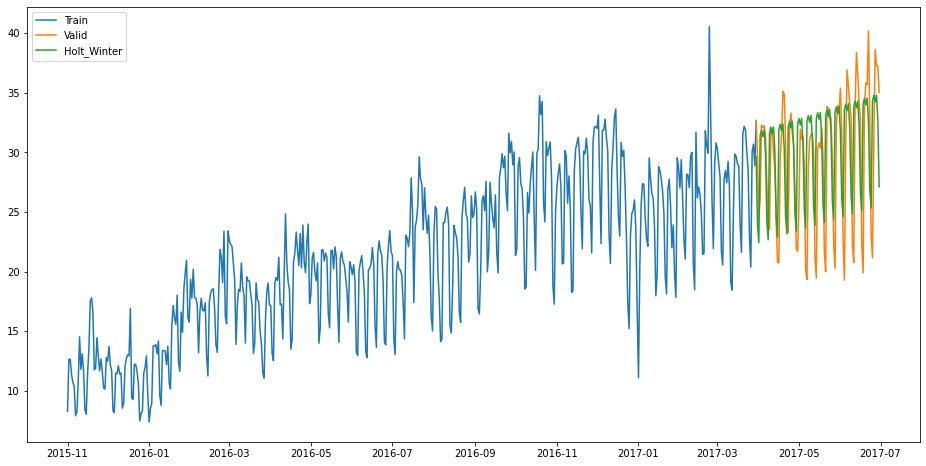

In [62]:
y_hat_avg = valid.copy() 
fit1 = ExponentialSmoothing(np.asarray(Train['Count']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit() 
y_hat_avg['Holt_Winter'] = fit1.forecast(len(valid)) 
plt.figure(figsize=(16,8)) 
plt.plot( Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter') 
plt.legend(loc='best') 
plt.show()

In [63]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_Winter)) 
print(rms)

5.3384985233657245


In [0]:
predict=fit1.forecast(len(test))

In [0]:
merge=pd.merge(test, test_original, on=('day','month', 'year'), how='left') 
merge['Hour']=merge['Hour_y'] 
merge=merge.drop(['year', 'month', 'Datetime','Hour_x','Hour_y'], axis=1) 

# Predicting by merging merge and temp2 
prediction=pd.merge(merge, temp2, on='Hour', how='left') 

# Converting the ratio to the original scale 
prediction['Count']=prediction['prediction']*prediction['ratio']*24
#Let’s drop all features other than ID and Count

prediction['ID']=prediction['ID_y'] 
submission=prediction.drop(['day','Hour','ratio','prediction', 'ID_x', 'ID_y'],axis=1) 

# Converting the final submission to csv format 
pd.DataFrame(submission, columns=['ID','Count']).to_csv('Holt winters.csv')

In [66]:
submission.head()

,Junction_x,Junction_y,Count,ID
0,2.5,1,30.620543,20170701001
1,2.5,1,25.566100,20170701011
2,2.5,1,22.246426,20170701021
3,2.5,1,19.312760,20170701031
4,2.5,1,16.874742,20170701041


In [0]:
sample['Vehicles']=submission['Count']
sample.to_csv('Holt winter.csv',index=False)

In [0]:
from statsmodels.tsa.stattools import adfuller 


In [0]:
def test_stationarity(timeseries):
    #rolmean = pd.rolling_mean(timeseries, window=24) # 24 hours on each day
    rolmean= pd.Series(timeseries).rolling(window=24).mean()
    rolstd= pd.Series(timeseries).rolling(window=24).std()
    #rolstd = pd.rolling_std(timeseries, window=24)
        #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
        #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [70]:
train_original['Count']

Datetime
2015-11-01 00:00:00    15
2015-11-01 01:00:00    13
2015-11-01 02:00:00    10
2015-11-01 03:00:00     7
2015-11-01 04:00:00     9
                       ..
2017-06-30 19:00:00    11
2017-06-30 20:00:00    30
2017-06-30 21:00:00    16
2017-06-30 22:00:00    22
2017-06-30 23:00:00    12
Name: Count, Length: 48120, dtype: int64

In [0]:
from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 20,10

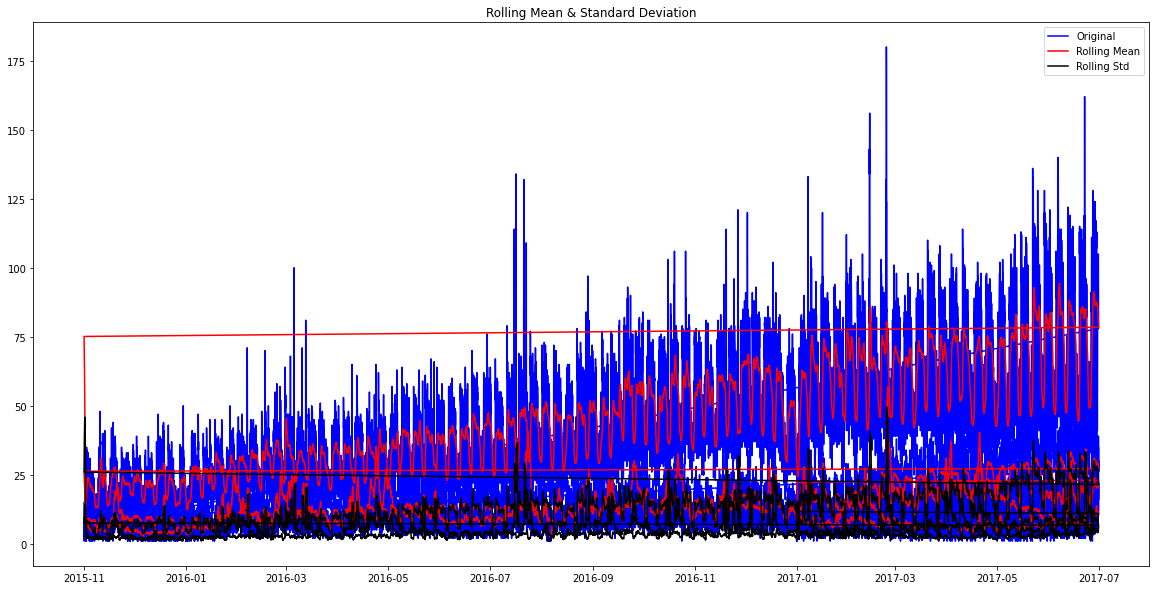

Results of Dickey-Fuller Test:
Test Statistic                -7.518278e+00
p-value                        3.851060e-11
#Lags Used                     5.700000e+01
Number of Observations Used    4.806200e+04
Critical Value (1%)           -3.430486e+00
Critical Value (5%)           -2.861600e+00
Critical Value (10%)          -2.566802e+00
dtype: float64


In [72]:
test_stationarity(train_original['Count'])

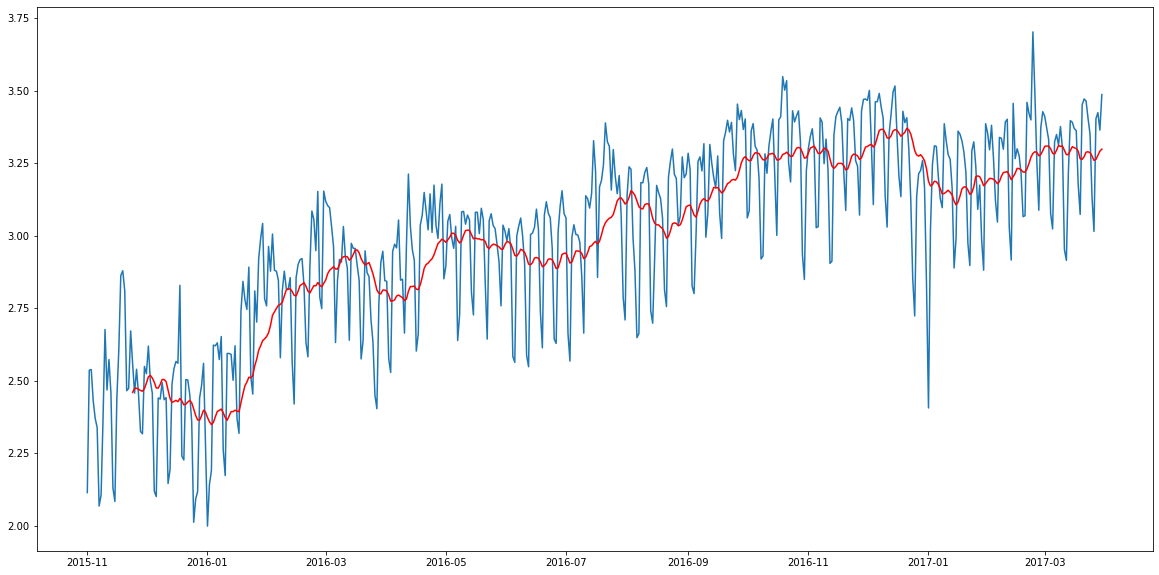

In [73]:
Train_log = np.log(Train['Count']) 
valid_log = np.log(valid['Count'])
moving_avg = pd.Series(Train_log).rolling(window=24).mean()
plt.plot(Train_log) 
plt.plot(moving_avg, color = 'red') 
plt.show()

In [0]:
train_log_moving_avg_diff = Train_log - moving_avg

In [75]:
train_log_moving_avg_diff

Datetime
2015-11-01         NaN
2015-11-02         NaN
2015-11-03         NaN
2015-11-04         NaN
2015-11-05         NaN
                ...   
2017-03-26   -0.245119
2017-03-27    0.140828
2017-03-28    0.146921
2017-03-29    0.072566
2017-03-30    0.188396
Freq: D, Name: Count, Length: 516, dtype: float64

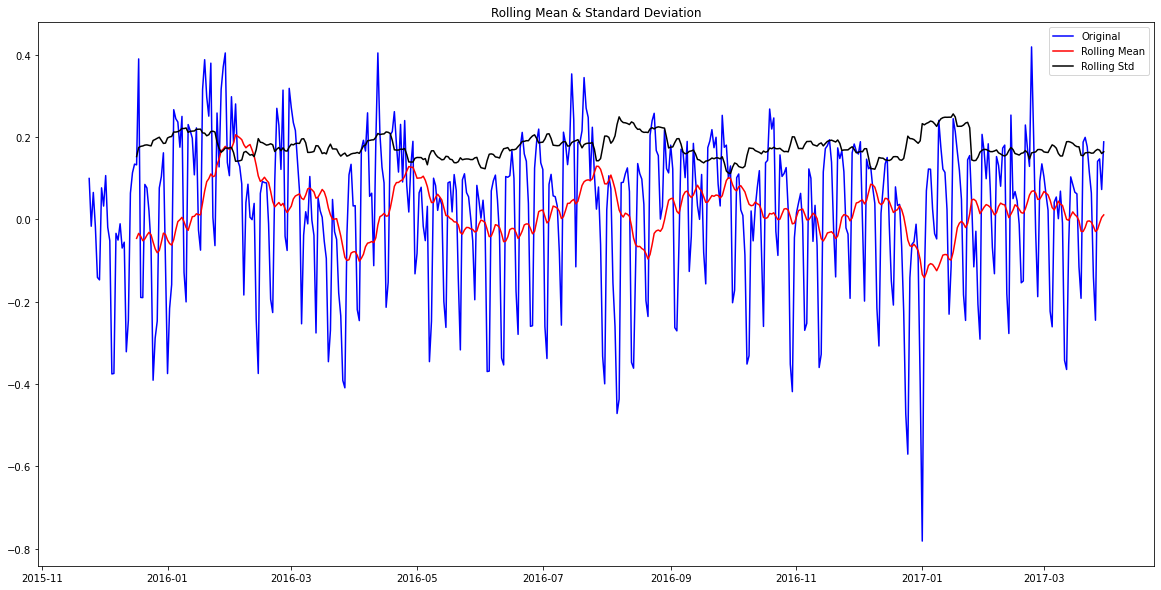

Results of Dickey-Fuller Test:
Test Statistic                -5.848499e+00
p-value                        3.635766e-07
#Lags Used                     1.400000e+01
Number of Observations Used    4.780000e+02
Critical Value (1%)           -3.444105e+00
Critical Value (5%)           -2.867606e+00
Critical Value (10%)          -2.570001e+00
dtype: float64


In [76]:
train_log_moving_avg_diff.dropna(inplace = True) 
test_stationarity(train_log_moving_avg_diff)

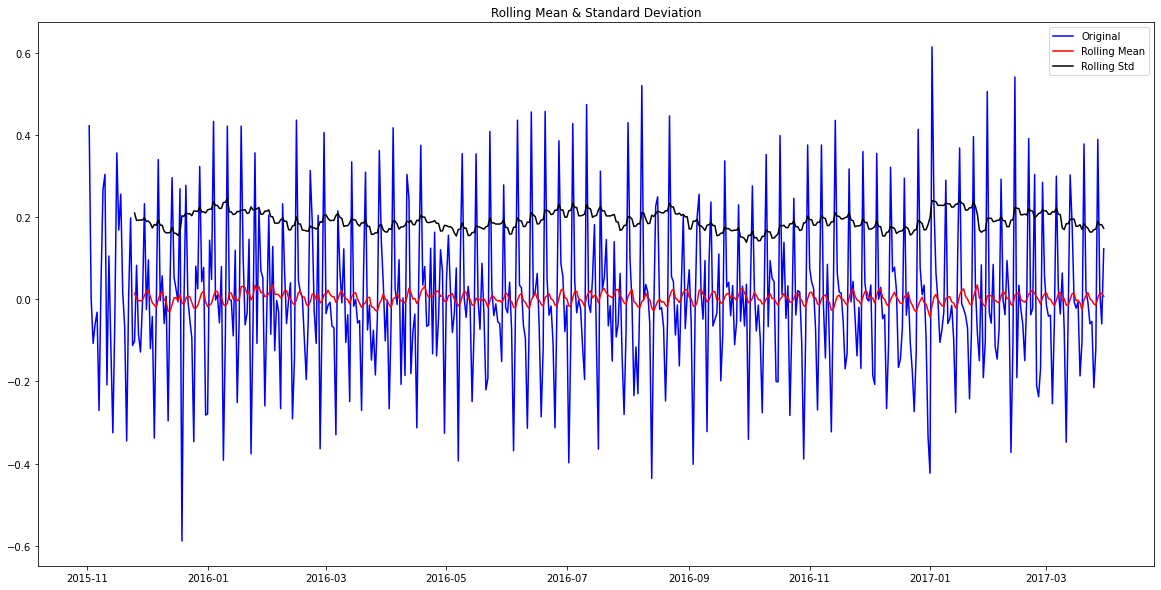

Results of Dickey-Fuller Test:
Test Statistic                -8.582628e+00
p-value                        7.655302e-14
#Lags Used                     1.900000e+01
Number of Observations Used    4.950000e+02
Critical Value (1%)           -3.443630e+00
Critical Value (5%)           -2.867397e+00
Critical Value (10%)          -2.569889e+00
dtype: float64


In [77]:
train_log_diff = Train_log - Train_log.shift(1) 
test_stationarity(train_log_diff.dropna())

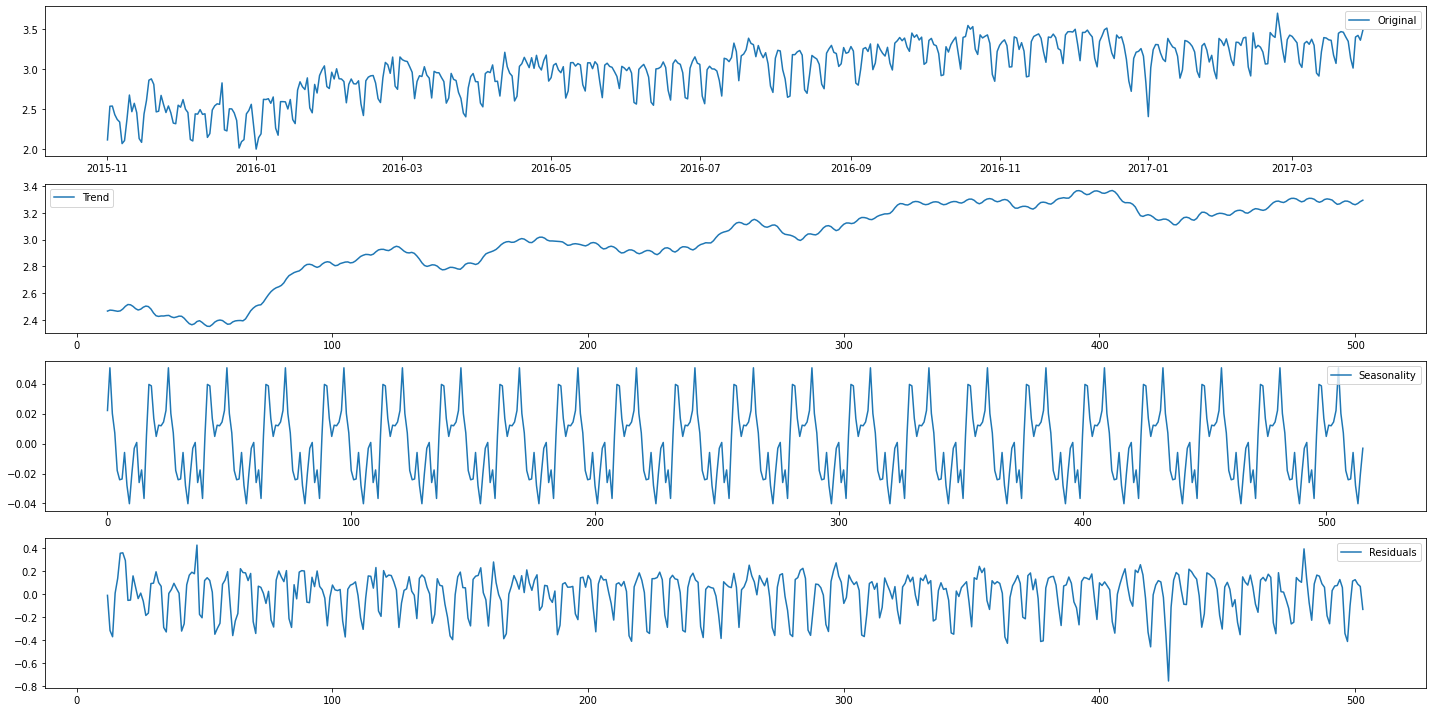

In [78]:
from statsmodels.tsa.seasonal import seasonal_decompose 
decomposition = seasonal_decompose(pd.DataFrame(Train_log).Count.values, freq = 24) 

trend = decomposition.trend 
seasonal = decomposition.seasonal 
residual = decomposition.resid 

plt.subplot(411) 
plt.plot(Train_log, label='Original') 
plt.legend(loc='best') 
plt.subplot(412) 
plt.plot(trend, label='Trend') 
plt.legend(loc='best') 
plt.subplot(413) 
plt.plot(seasonal,label='Seasonality') 
plt.legend(loc='best') 
plt.subplot(414) 
plt.plot(residual, label='Residuals') 
plt.legend(loc='best') 
plt.tight_layout() 
plt.show()

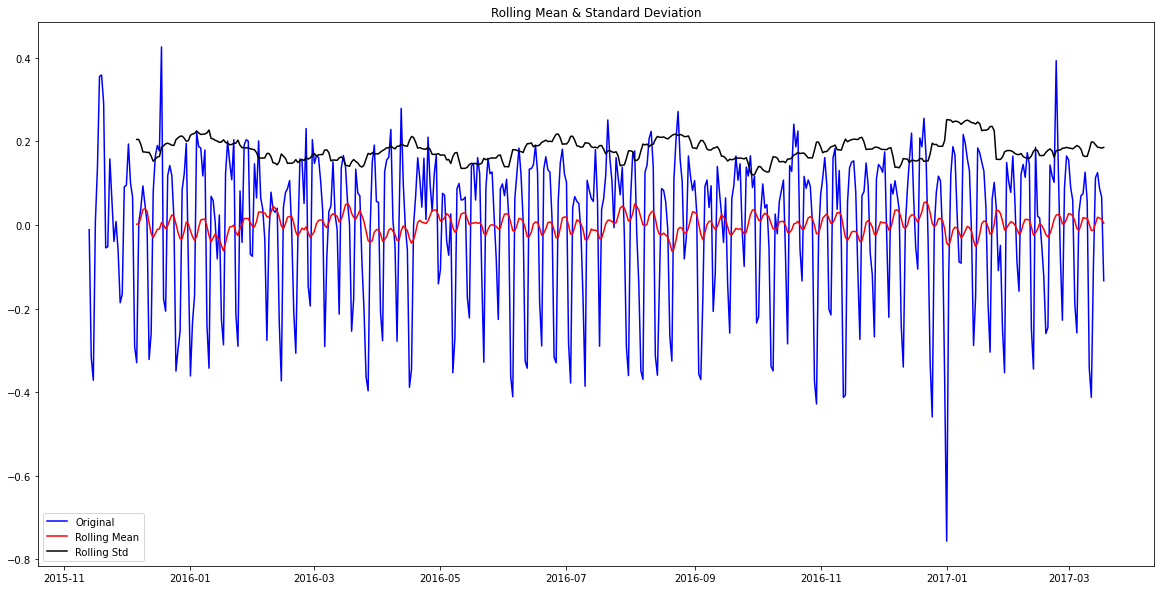

Results of Dickey-Fuller Test:
Test Statistic                -8.495560e+00
p-value                        1.278748e-13
#Lags Used                     1.600000e+01
Number of Observations Used    4.750000e+02
Critical Value (1%)           -3.444192e+00
Critical Value (5%)           -2.867644e+00
Critical Value (10%)          -2.570021e+00
dtype: float64


In [79]:
train_log_decompose = pd.DataFrame(residual) 
train_log_decompose['date'] = Train_log.index 
train_log_decompose.set_index('date', inplace = True) 
train_log_decompose.dropna(inplace=True) 
test_stationarity(train_log_decompose[0])

In [0]:
from statsmodels.tsa.stattools import acf, pacf 
lag_acf = acf(train_log_diff.dropna(), nlags=25) 
lag_pacf = pacf(train_log_diff.dropna(), nlags=25, method='ols')

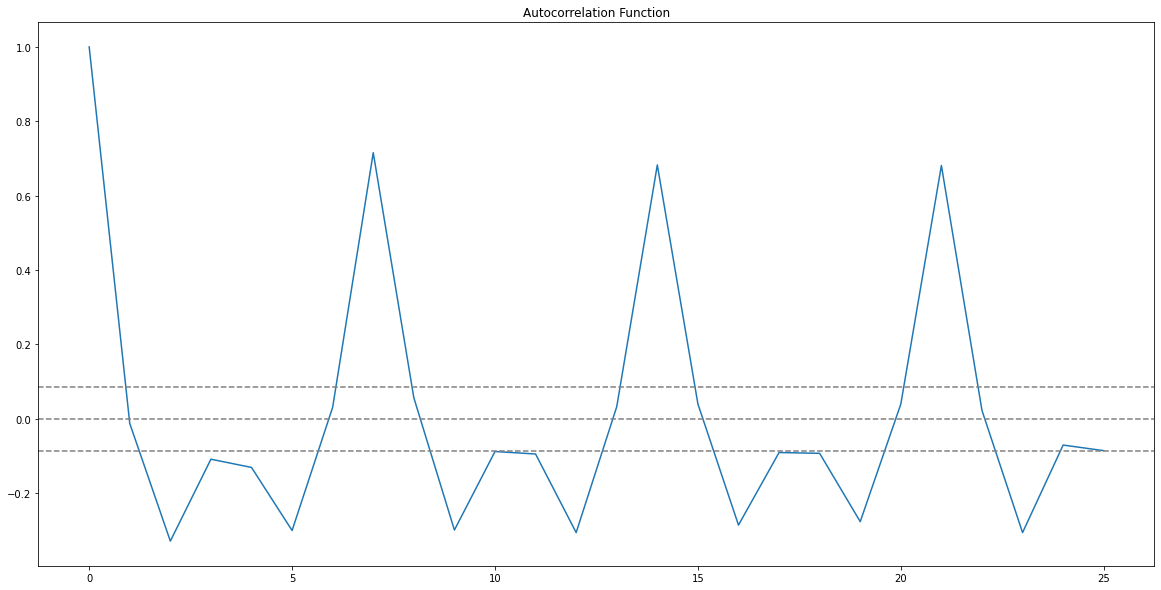

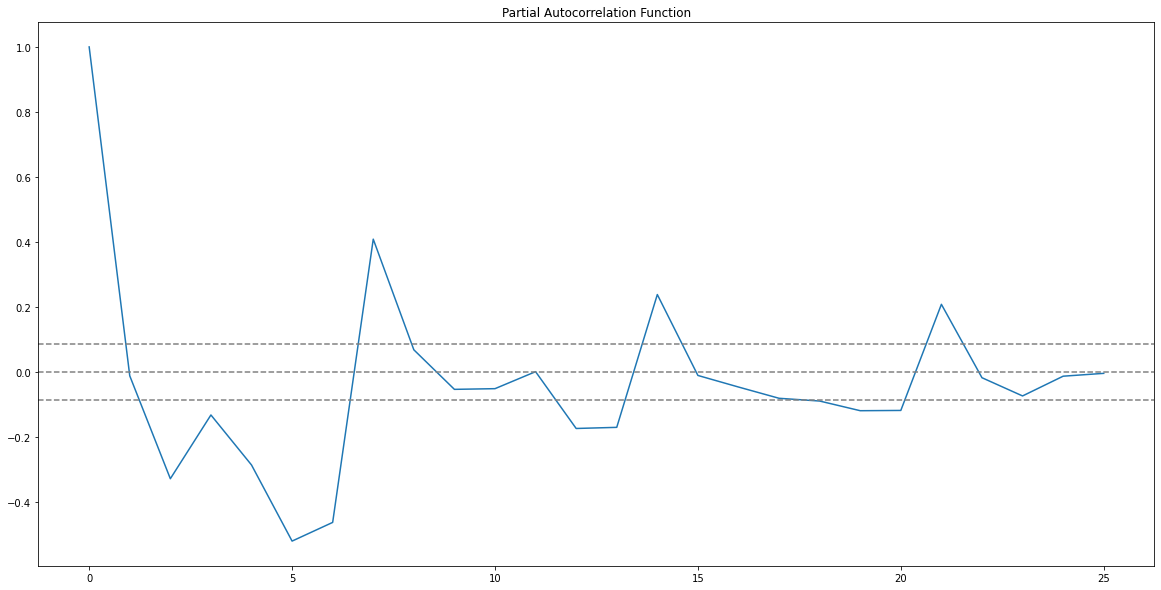

In [81]:
plt.plot(lag_acf) 
plt.axhline(y=0,linestyle='--',color='gray') 
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray') 
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.title('Autocorrelation Function') 
plt.show() 
plt.plot(lag_pacf) 
plt.axhline(y=0,linestyle='--',color='gray') 
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray') 
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray') 
plt.title('Partial Autocorrelation Function') 
plt.show()

In [82]:
type(Train_log)

pandas.core.series.Series

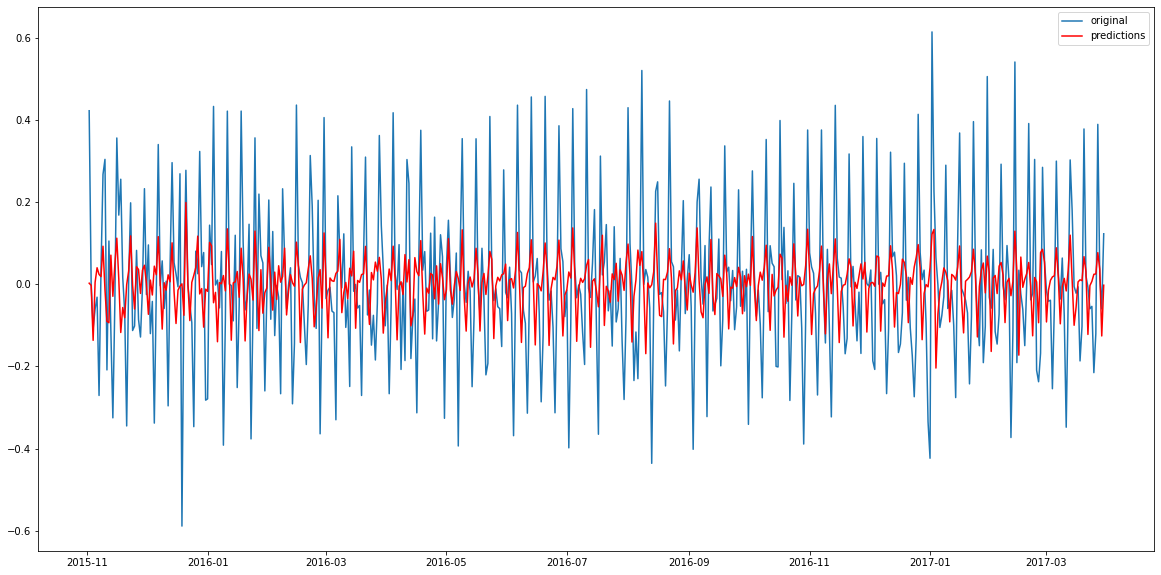

In [83]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(Train_log, order=(2, 1, 0))  # here the q value is zero since it is just the AR model 
results_AR = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(), label='original') 
plt.plot(results_AR.fittedvalues, color='red', label='predictions') 
plt.legend(loc='best') 
plt.show()

In [84]:
valid_log.index

DatetimeIndex(['2017-03-30', '2017-03-31', '2017-04-01', '2017-04-02',
               '2017-04-03', '2017-04-04', '2017-04-05', '2017-04-06',
               '2017-04-07', '2017-04-08', '2017-04-09', '2017-04-10',
               '2017-04-11', '2017-04-12', '2017-04-13', '2017-04-14',
               '2017-04-15', '2017-04-16', '2017-04-17', '2017-04-18',
               '2017-04-19', '2017-04-20', '2017-04-21', '2017-04-22',
               '2017-04-23', '2017-04-24', '2017-04-25', '2017-04-26',
               '2017-04-27', '2017-04-28', '2017-04-29', '2017-04-30',
               '2017-05-01', '2017-05-02', '2017-05-03', '2017-05-04',
               '2017-05-05', '2017-05-06', '2017-05-07', '2017-05-08',
               '2017-05-09', '2017-05-10', '2017-05-11', '2017-05-12',
               '2017-05-13', '2017-05-14', '2017-05-15', '2017-05-16',
               '2017-05-17', '2017-05-18', '2017-05-19', '2017-05-20',
               '2017-05-21', '2017-05-22', '2017-05-23', '2017-05-24',
      

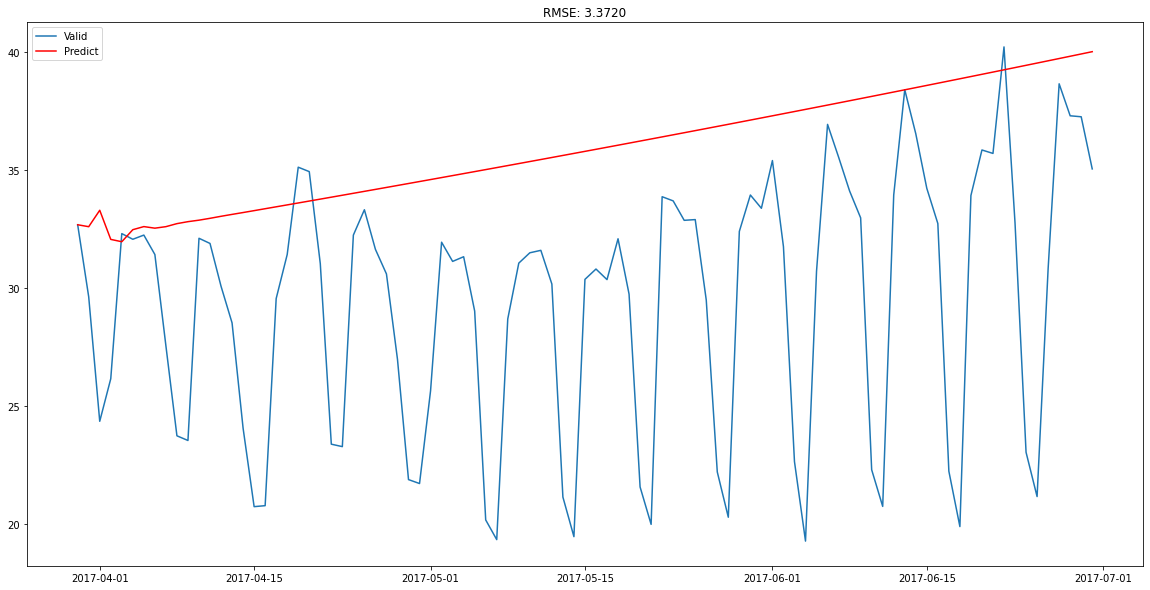

In [85]:
AR_predict=results_AR.predict(start='2017-03-30',end='2017-06-30') 
AR_predict=AR_predict.cumsum().shift().fillna(0)
AR_predict1=pd.Series(np.ones(valid.shape[0]) * np.log(valid['Count'])[0], index = valid.index) 
AR_predict1=AR_predict1.add(AR_predict,fill_value=0) 
AR_predict = np.exp(AR_predict1)
plt.plot(valid['Count'], label = "Valid") 
plt.plot(AR_predict, color = 'red', label = "Predict") 
plt.legend(loc= 'best') 
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(AR_predict, valid['Count']))/valid.shape[0]))
plt.show()

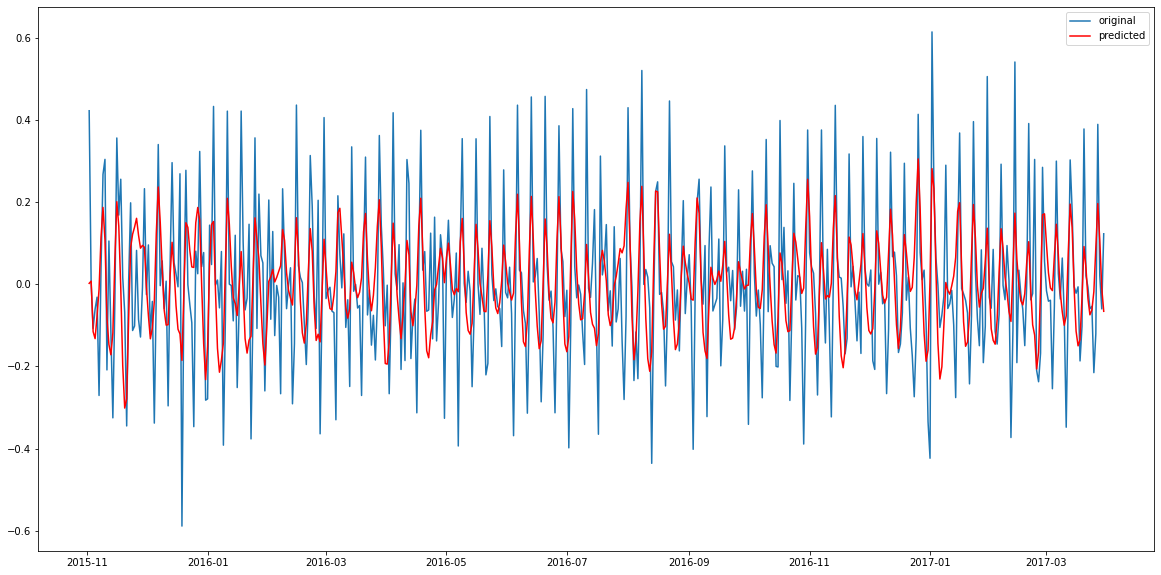

In [86]:
model = ARIMA(Train_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(),  label='original') 
plt.plot(results_ARIMA.fittedvalues, color='red', label='predicted') 
plt.legend(loc='best') 
plt.show()

In [0]:
def check_prediction_diff(predict_diff, given_set):
    predict_diff= predict_diff.cumsum().shift().fillna(0)
    predict_base = pd.Series(np.ones(given_set.shape[0]) * np.log(given_set['Count'])[0], index = given_set.index)
    predict_log = predict_base.add(predict_diff,fill_value=0)
    predict = np.exp(predict_log)

    plt.plot(given_set['Count'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))
    plt.show()

def check_prediction_log(predict_log, given_set):
    predict = np.exp(predict_log)
 
    plt.plot(given_set['Count'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))
    plt.show()

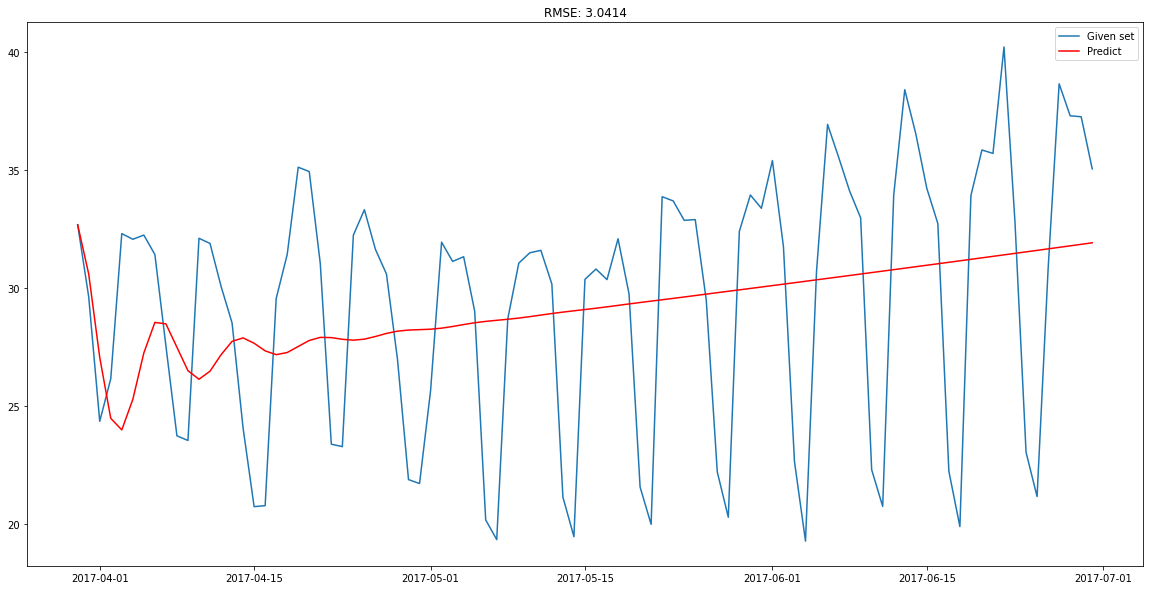

In [88]:
ARIMA_predict_diff=results_ARIMA.predict(start='2017-03-30',end='2017-06-30')
check_prediction_diff(ARIMA_predict_diff, valid)

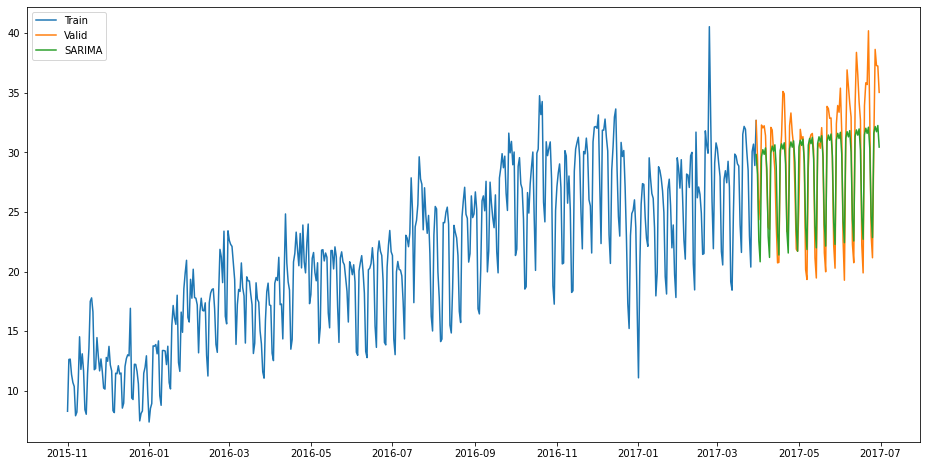

In [89]:
import statsmodels.api as sm
y_hat_avg = valid.copy() 
fit1 = sm.tsa.statespace.SARIMAX(Train.Count, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit() 
y_hat_avg['SARIMA'] = fit1.predict(start='2017-03-30',end='2017-06-30', dynamic=True)
plt.figure(figsize=(16,8))
plt.plot( Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['SARIMA'], label='SARIMA') 
plt.legend(loc='best') 
plt.show()

In [90]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.SARIMA)) 
print(rms)

2.770638330240988


In [91]:
test.index

DatetimeIndex(['2017-07-01', '2017-07-02', '2017-07-03', '2017-07-04',
               '2017-07-05', '2017-07-06', '2017-07-07', '2017-07-08',
               '2017-07-09', '2017-07-10',
               ...
               '2017-10-22', '2017-10-23', '2017-10-24', '2017-10-25',
               '2017-10-26', '2017-10-27', '2017-10-28', '2017-10-29',
               '2017-10-30', '2017-10-31'],
              dtype='datetime64[ns]', name='Datetime', length=123, freq='D')

In [0]:
predict=fit1.predict(start="2017-07-01", end="2017-10-31")

In [0]:
test['prediction']=predict
# Merge Test and test_original on day, month and year 
merge=pd.merge(test, test_original, on=('day','month', 'year'), how='left') 
merge['Hour']=merge['Hour_y'] 
merge=merge.drop(['year', 'month', 'Datetime','Hour_x','Hour_y'], axis=1) 

# Predicting by merging merge and temp2 
prediction=pd.merge(merge, temp2, on='Hour', how='left') 

# Converting the ratio to the original scale 
prediction['Count']=prediction['prediction']*prediction['ratio']*24
#Let’s drop all variables other than ID and Count

prediction['ID']=prediction['ID_y'] 
submission=prediction.drop(['day','Hour','ratio','prediction', 'ID_x', 'ID_y'],axis=1) 

# Converting the final submission to csv format 
pd.DataFrame(submission, columns=['ID','Count']).to_csv('SARIMAX.csv')

In [94]:
prediction.head()

,Junction_x,ID_x,day,prediction,Junction_y,ID_y,Hour,ratio,Count,ID
0,2.5,2.017070e+10,1.0,25.325286,1,20170701001,0,0.043037,26.157910,20170701001
1,2.5,2.017070e+10,1.0,25.325286,1,20170701011,1,0.035933,21.840101,20170701011
2,2.5,2.017070e+10,1.0,25.325286,1,20170701021,2,0.031267,19.004235,20170701021
3,2.5,2.017070e+10,1.0,25.325286,1,20170701031,3,0.027144,16.498121,20170701031
4,2.5,2.017070e+10,1.0,25.325286,1,20170701041,4,0.023717,14.415420,20170701041


In [0]:
sample['Vehicles']=prediction['Count']
sample.to_csv('SARIMAX.csv',index=False)